# 实验四：线性回归


## 实验目的

通过本实验让学生了解一元线性回归和最小二乘法的基本原理，能使用sklearn库建立相关回归模型解决简单回归问题。

## 实验要求：


（1）编码规范
（2）代码高效
（3）注释充分，程序可读性好
（4）程序无bug
（5）方法接口规范定义

## 实验内容

根据给定的房价历史数据，使用一元线性回归和多项式回归建立房价预测模型，并对模型性能进行评估对比


## 实验步骤

## 1.数据集读取

In [3]:
#code
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

datasets_X = []
datasets_Y = []
fr = open('实验四数据_prices.txt','r')
lines = fr.readlines()
for line in lines:
    items = line.strip().split(',')
    datasets_X.append(int(items[0]))
    datasets_Y.append(int(items[1]))

### 2.数据加载

In [4]:
# -*- coding: utf-8 -*-
length = len(datasets_X)
datasets_X = np.array(datasets_X).reshape([length,1])
datasets_Y = np.array(datasets_Y)

### 3.数据归一化

In [5]:
#code
minX = min(datasets_X)
maxX = max(datasets_X)
X = np.arange(minX,maxX).reshape([-1,1])

### 4.模型构建

In [6]:
#code
linear = linear_model.LinearRegression()

### 5.模型训练

In [7]:
#结果显示
linear.fit(datasets_X, datasets_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 6.模型可视化

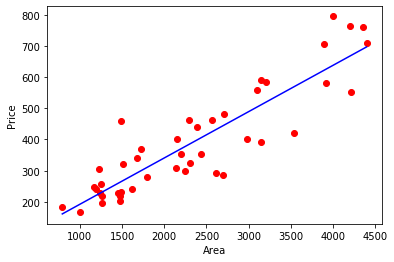

In [8]:
plt.scatter(datasets_X, datasets_Y, color = 'red')
plt.plot(X, linear.predict(X), color = 'blue')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

### 7.多项式回归

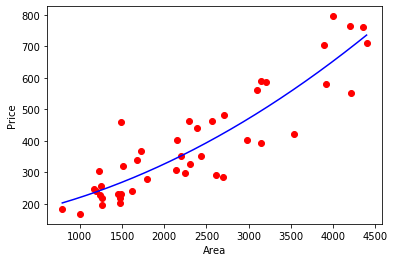

In [13]:
from sklearn.preprocessing import PolynomialFeatures

#多项式回归模型
poly_reg = PolynomialFeatures(degree = 2)
#创建二次多项式特征
X_poly = poly_reg.fit_transform(datasets_X)
lin_reg_2 = linear_model.LinearRegression()
#模型拟合/训练
lin_reg_2.fit(X_poly, datasets_Y)
 
# 图像中显示
plt.scatter(datasets_X, datasets_Y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

### 8.算法性能评估比对

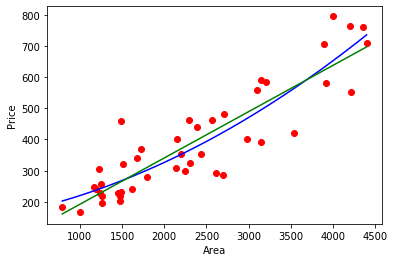

In [14]:
plt.scatter(datasets_X, datasets_Y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.plot(X, linear.predict(X), color = 'green')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

## 实验总结

In [15]:
#总结
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# MSE：均方差
y1_pre=linear.predict(datasets_X)
y2_pre=lin_reg_2.predict(X_poly)
mse_line= mean_squared_error(datasets_Y, y1_pre)
mse_lin_reg_2= mean_squared_error(datasets_Y, y2_pre)

print("线性回归均方差:",mse_line)
print("多项式回归均方差:",mse_lin_reg_2)
# MAE 平均绝对误差
mae_line = mean_absolute_error(datasets_Y, y1_pre)
mae_lin_reg_2= mean_absolute_error(datasets_Y, y2_pre)

print("线性回归平均绝对误差:",mae_line)
print("多项式回归平均绝对误差:",mae_lin_reg_2)

线性回归均方差: 5947.480118542005
多项式回归均方差: 5605.942144505361
线性回归平均绝对误差: 63.330888150378854
多项式回归平均绝对误差: 62.04703055004947
